## London Bike Riders

source: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset

# Metadata:
 - "timestamp" - timestamp field for grouping the data
 - "cnt" - the count of a new bike shares
 - "t1" - real temperature in C
 - "t2" - temperature in C "feels like"
 - "hum" - humidity in percentage
 - "wind_speed" - wind speed in km/h
 - "weather_code" - category of the weather
 - "is_holiday" - boolean field - 1 holiday / 0 non holiday
 - "is_weekend" - boolean field - 1 if the day is weekend
 - "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weathe_code" category description:

1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
%matplotlib inline
import warnings
import zipfile
warnings.filterwarnings('ignore')
import os
import sys

In [ ]:
os.chdir(os.path.sep)
os.chdir("london_bike_share/dataset")
print(os.getcwd())

d:\data_analysis_projects\dataset


In [387]:
!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset
License(s): other
london-bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [388]:
zipfile_name = 'london-bike-sharing-dataset.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [ ]:
os.chdir(os.path.sep)
os.chdir("london_bike_share")
print(os.getcwd())

d:\data_analysis_projects


In [390]:
bikes_df_original = pd.read_csv("dataset/london_merged.csv")
bikes_df = bikes_df_original.copy()
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [391]:
bikes_df.shape

(17414, 10)

In [392]:
bikes_df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [393]:
# weather_code column unique values
bikes_df.weather_code.value_counts()

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [394]:
# season column unique values
bikes_df.season.value_counts()

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [395]:
# renaming columns
new_cols_dict = {
    'timestamp':'time',
    'cnt':'count', 
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'
}

bikes_df.rename(new_cols_dict, axis=1, inplace=True)
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               17414 non-null  object 
 1   count              17414 non-null  int64  
 2   temp_real_C        17414 non-null  float64
 3   temp_feels_like_C  17414 non-null  float64
 4   humidity_percent   17414 non-null  float64
 5   wind_speed_kph     17414 non-null  float64
 6   weather            17414 non-null  float64
 7   is_holiday         17414 non-null  float64
 8   is_weekend         17414 non-null  float64
 9   season             17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [396]:
# changing humidity values to percentage(0-1)
bikes_df['humidity_percent'] = bikes_df['humidity_percent']/100
bikes_df["humidity_percent"]

0        0.930
1        0.930
2        0.965
3        1.000
4        0.930
         ...  
17409    0.810
17410    0.810
17411    0.785
17412    0.760
17413    0.760
Name: humidity_percent, Length: 17414, dtype: float64

In [397]:
bikes_df.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,1.0,0.0,1.0,3.0


In [398]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               17414 non-null  object 
 1   count              17414 non-null  int64  
 2   temp_real_C        17414 non-null  float64
 3   temp_feels_like_C  17414 non-null  float64
 4   humidity_percent   17414 non-null  float64
 5   wind_speed_kph     17414 non-null  float64
 6   weather            17414 non-null  float64
 7   is_holiday         17414 non-null  float64
 8   is_weekend         17414 non-null  float64
 9   season             17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [399]:
bikes_df.drop_duplicates(inplace=True)
bikes_df.dropna(inplace=True)

In [400]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               17414 non-null  object 
 1   count              17414 non-null  int64  
 2   temp_real_C        17414 non-null  float64
 3   temp_feels_like_C  17414 non-null  float64
 4   humidity_percent   17414 non-null  float64
 5   wind_speed_kph     17414 non-null  float64
 6   weather            17414 non-null  float64
 7   is_holiday         17414 non-null  float64
 8   is_weekend         17414 non-null  float64
 9   season             17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [401]:
bikes_df.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,1.0,0.0,1.0,3.0


In [402]:
# converting time column to datetime
bikes_df['time'] = pd.to_datetime(bikes_df['time'])
bikes_df['time'].head()

0   2015-01-04 00:00:00
1   2015-01-04 01:00:00
2   2015-01-04 02:00:00
3   2015-01-04 03:00:00
4   2015-01-04 04:00:00
Name: time, dtype: datetime64[ns]

In [403]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time               17414 non-null  datetime64[ns]
 1   count              17414 non-null  int64         
 2   temp_real_C        17414 non-null  float64       
 3   temp_feels_like_C  17414 non-null  float64       
 4   humidity_percent   17414 non-null  float64       
 5   wind_speed_kph     17414 non-null  float64       
 6   weather            17414 non-null  float64       
 7   is_holiday         17414 non-null  float64       
 8   is_weekend         17414 non-null  float64       
 9   season             17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [404]:
bikes_df.isnull().sum()

time                 0
count                0
temp_real_C          0
temp_feels_like_C    0
humidity_percent     0
wind_speed_kph       0
weather              0
is_holiday           0
is_weekend           0
season               0
dtype: int64

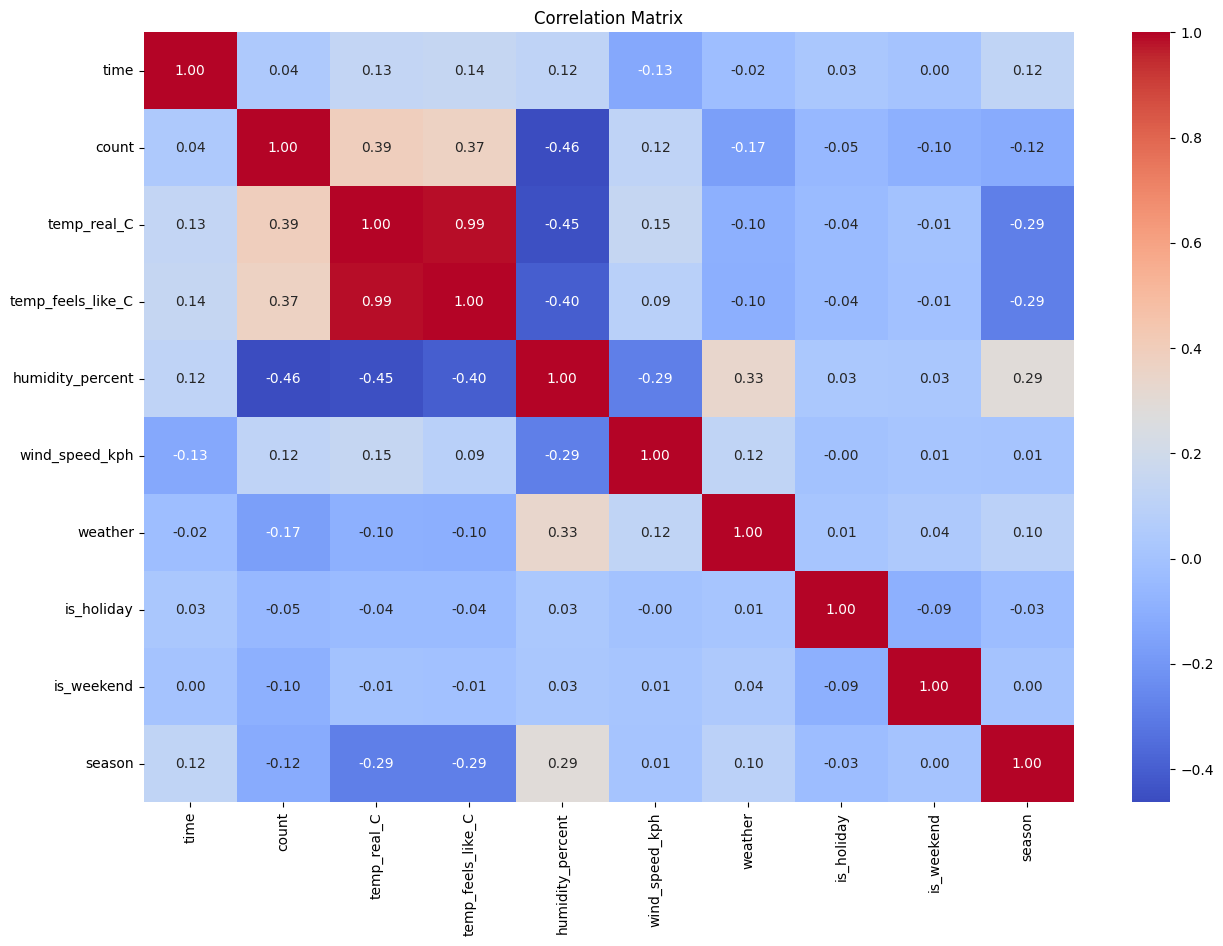

In [405]:
### Exploratory Data Analysis (EDA) and Visualization
# Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(bikes_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [406]:
bikes_df.drop(columns=['temp_feels_like_C'], inplace=True)
bikes_df.head()

,time,count,temp_real_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,0.930,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,0.930,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,0.965,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,1.000,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.930,6.5,1.0,0.0,1.0,3.0


In [407]:
bikes_df.corr()

,time,count,temp_real_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
time,1.000000,0.039995,0.131745,0.119461,-0.126176,-0.024378,0.026335,0.000223,0.124607
count,0.039995,1.000000,0.388798,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180
temp_real_C,0.131745,0.388798,1.000000,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851
humidity_percent,0.119461,-0.462901,-0.447781,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381
wind_speed_kph,-0.126176,0.116295,0.145471,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305
weather,-0.024378,-0.166633,-0.097114,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976
is_holiday,0.026335,-0.051698,-0.042233,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488
is_weekend,0.000223,-0.096499,-0.005342,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067
season,0.124607,-0.116180,-0.285851,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000


In [408]:
bikes_df.set_index('time', inplace=True)

In [409]:
bikes_df.to_csv("dataset/london_bike_cleaned.csv", header=True)

In [410]:
bikes_df.head()

,count,temp_real_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
time,,,,,,,,
2015-01-04 00:00:00,182,3.0,0.930,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,0.930,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,0.965,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,1.000,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.930,6.5,1.0,0.0,1.0,3.0
